In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [56]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/Obesity Estimation/obesity_estimation.csv')

In [57]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [59]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [60]:
df.duplicated().value_counts()

,count
False,2087
True,24


In [61]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [62]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

## Data Visualization

Male: 1052
Female: 1035


<Axes: xlabel='Gender', ylabel='count'>

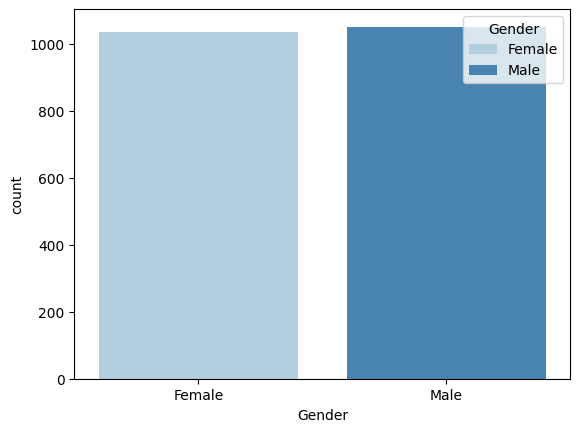

In [63]:
print(f"Male: {df['Gender'].value_counts().iloc[0]}")
print(f"Female: {df['Gender'].value_counts().iloc[1]}")

sns.countplot(data=df, x="Gender", hue="Gender", palette="Blues", legend="brief")

In [64]:
df.groupby(["Gender", "NObeyesdad"]).size().reset_index(name="count")

,Gender,NObeyesdad,count
0,Female,Insufficient_Weight,169
1,Female,Normal_Weight,137
2,Female,Obesity_Type_I,156
3,Female,Obesity_Type_II,2
4,Female,Obesity_Type_III,323
5,Female,Overweight_Level_I,145
6,Female,Overweight_Level_II,103
7,Male,Insufficient_Weight,98
8,Male,Normal_Weight,145
9,Male,Obesity_Type_I,195


<Axes: xlabel='NObeyesdad', ylabel='count'>

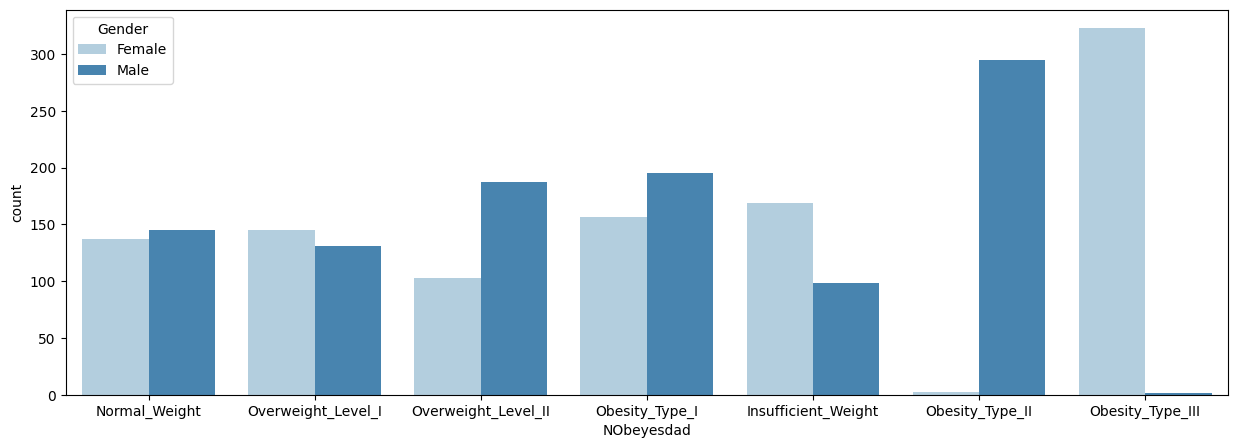

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="NObeyesdad", hue="Gender", palette="Blues")

<Axes: xlabel='family_history_with_overweight', ylabel='NObeyesdad'>

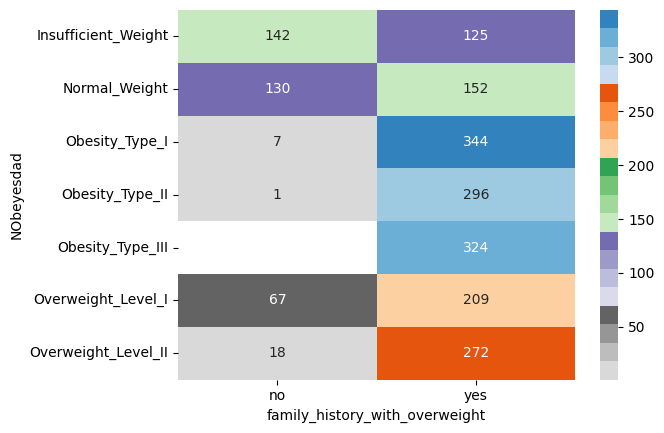

In [66]:
pivot_table = df.pivot_table(index='NObeyesdad', columns='family_history_with_overweight', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

<Axes: xlabel='FAVC', ylabel='NObeyesdad'>

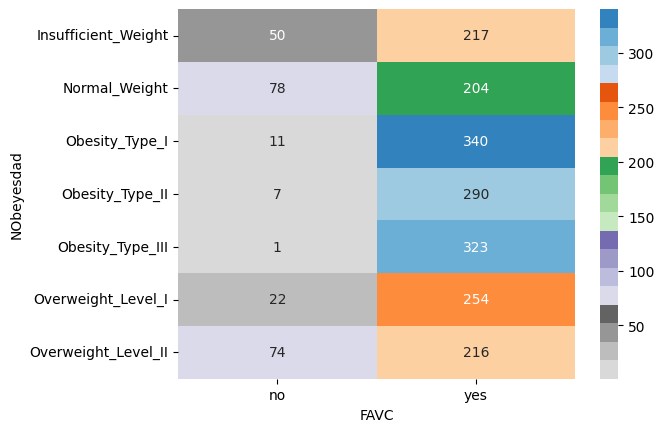

In [67]:
pivot_table = df.pivot_table(index='NObeyesdad', columns='FAVC', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

<Axes: xlabel='CAEC', ylabel='NObeyesdad'>

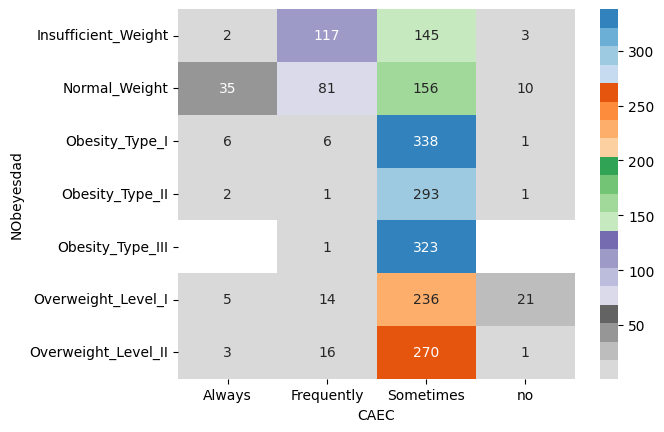

In [68]:
pivot_table = df.pivot_table(index='NObeyesdad', columns='CAEC', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

In [69]:
df_n = df[['Age', 'NObeyesdad']]
df_n.loc[:, 'Age'] = df_n['Age'].round()

In [70]:
df_n['Age'].unique()

array([21., 23., 27., 22., 29., 24., 26., 41., 30., 52., 20., 19., 31.,
       39., 17., 25., 55., 38., 18., 15., 61., 44., 34., 36., 32., 35.,
       40., 45., 33., 51., 56., 28., 16., 37., 14., 42., 43., 46., 48.,
       47.])

In [71]:
df_n.groupby(["Age", "NObeyesdad"]).size().reset_index(name="count")

,Age,NObeyesdad,count
0,14.0,Normal_Weight,1
1,15.0,Obesity_Type_I,1
2,16.0,Insufficient_Weight,6
3,16.0,Normal_Weight,5
4,16.0,Obesity_Type_I,1
...,...,...,...
154,52.0,Obesity_Type_I,1
155,55.0,Overweight_Level_I,1
156,55.0,Overweight_Level_II,4
157,56.0,Overweight_Level_II,1


<Axes: xlabel='count', ylabel='Age'>

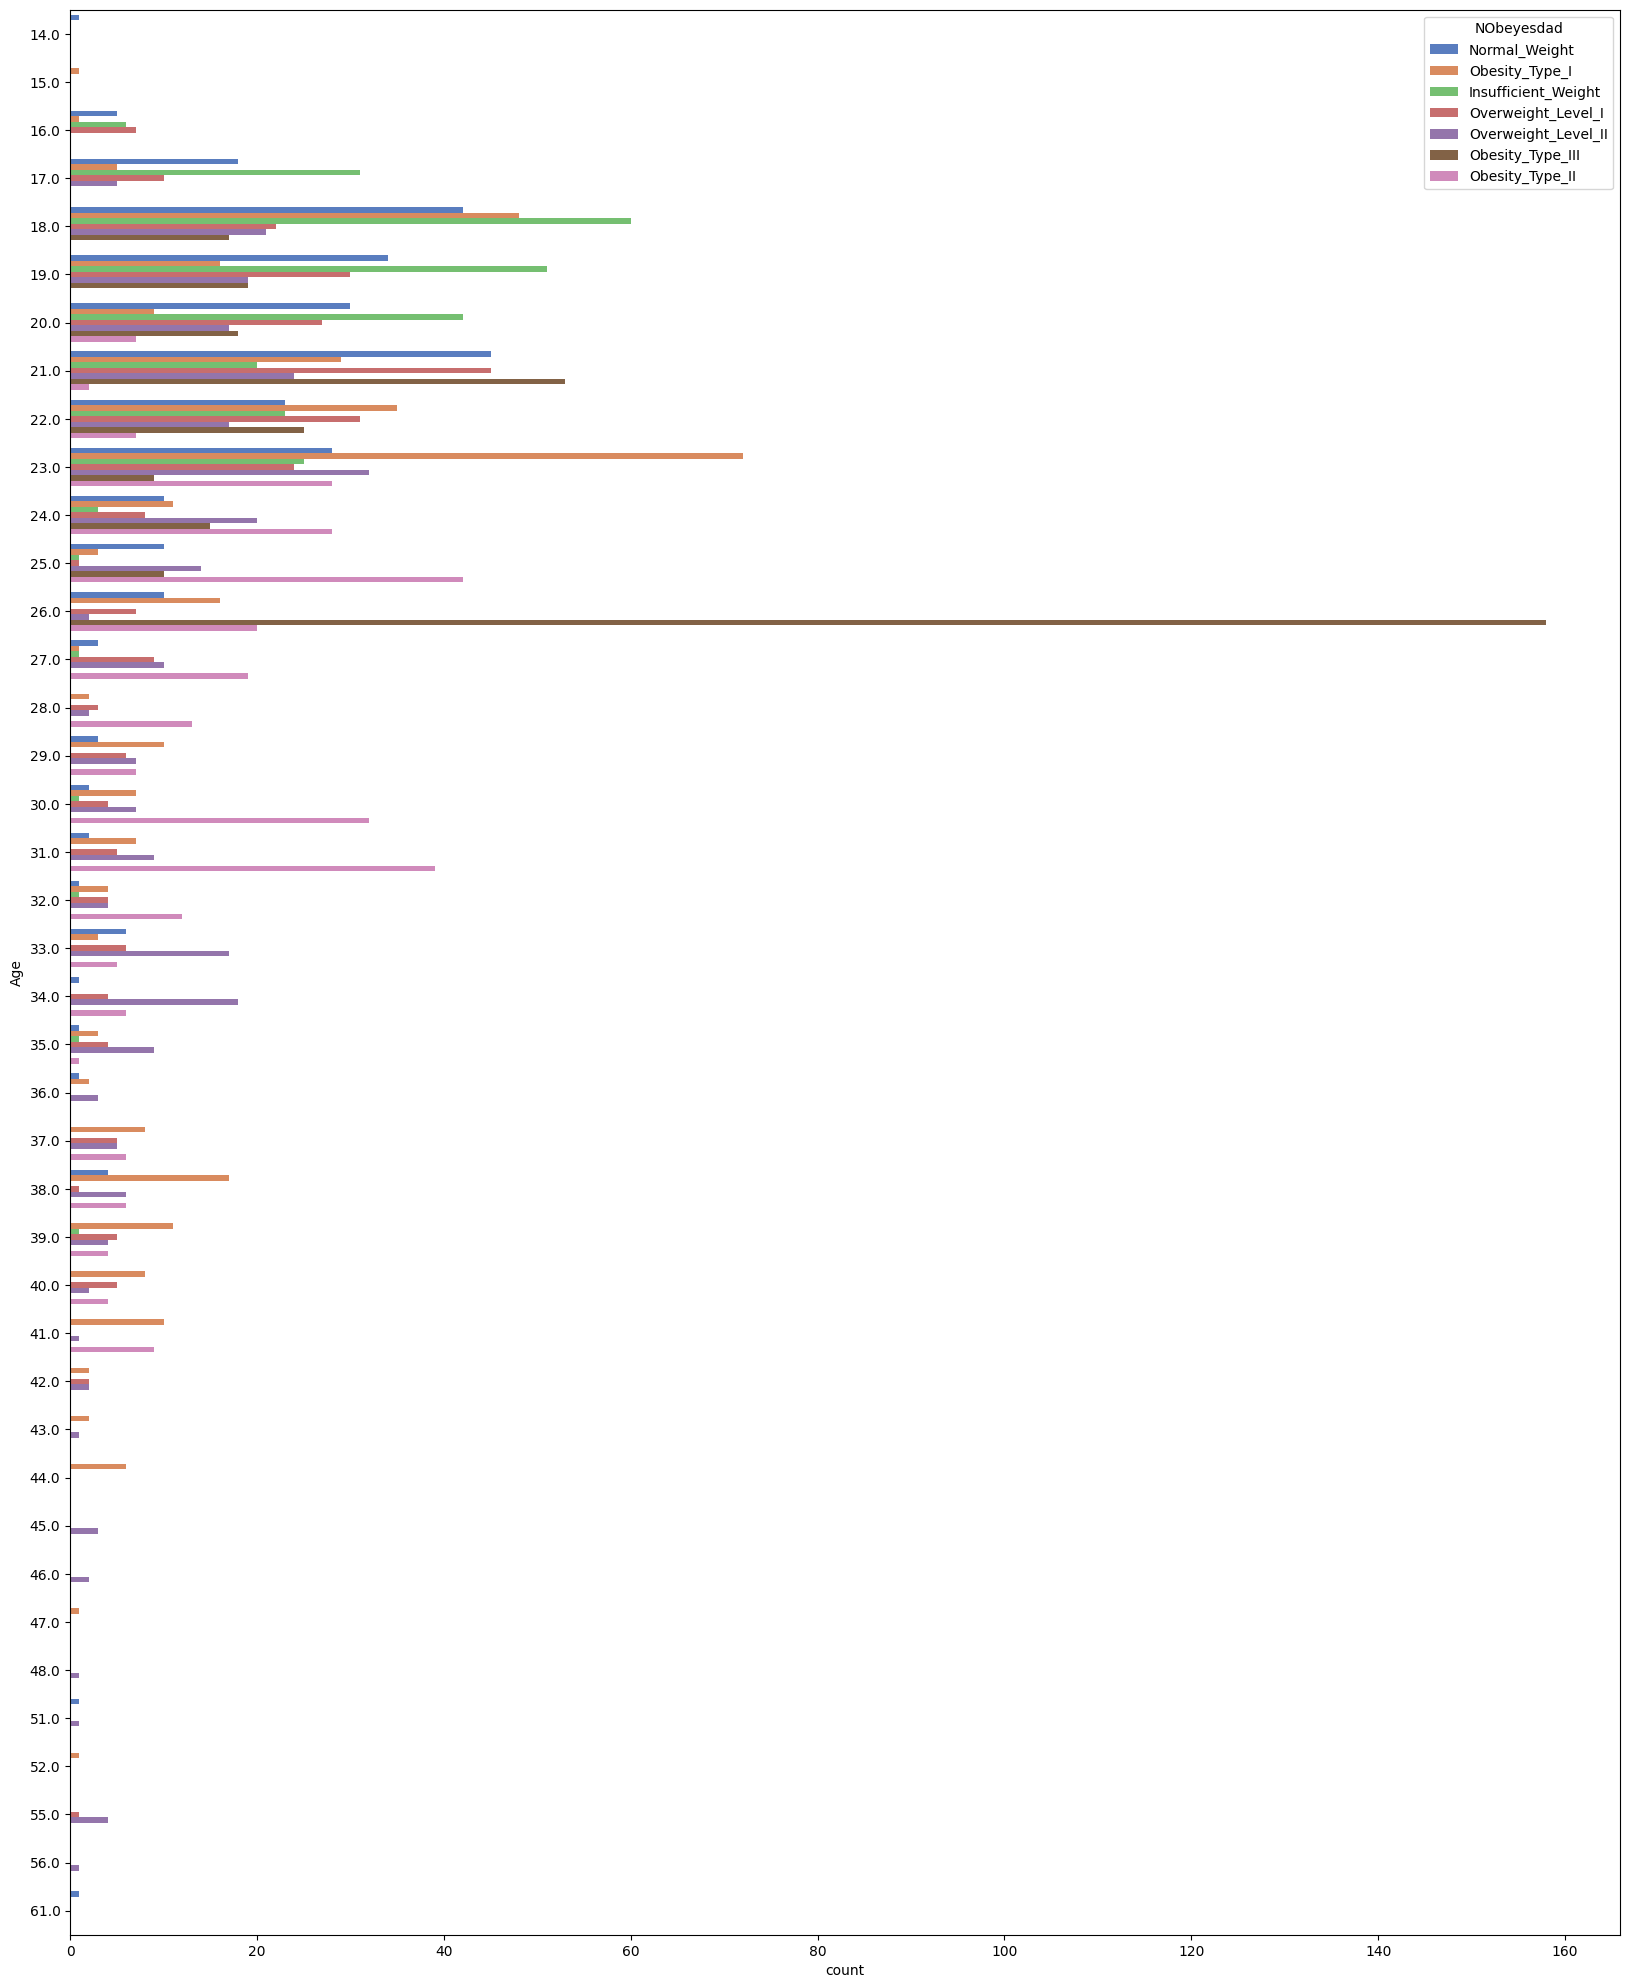

In [72]:
plt.figure(figsize=(20, 25))
sns.countplot(data=df_n, y='Age', hue='NObeyesdad', palette="muted")

In [73]:
df_n = df[['CALC', 'NObeyesdad']]

In [74]:
df_n.groupby(["CALC", "NObeyesdad"]).size().reset_index(name="count")

,CALC,NObeyesdad,count
0,Always,Normal_Weight,1
1,Frequently,Insufficient_Weight,1
2,Frequently,Normal_Weight,18
3,Frequently,Obesity_Type_I,14
4,Frequently,Obesity_Type_II,2
5,Frequently,Overweight_Level_I,16
6,Frequently,Overweight_Level_II,19
7,Sometimes,Insufficient_Weight,149
8,Sometimes,Normal_Weight,159
9,Sometimes,Obesity_Type_I,172


<Axes: xlabel='count', ylabel='CALC'>

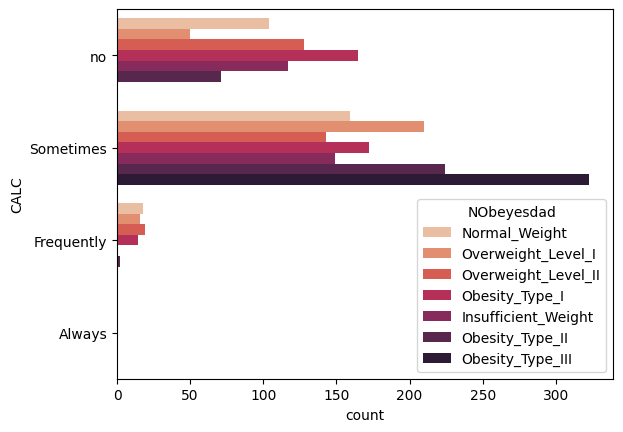

In [75]:
sns.countplot(data=df_n, y='CALC', hue='NObeyesdad', palette="rocket_r")

<Axes: xlabel='SMOKE', ylabel='NObeyesdad'>

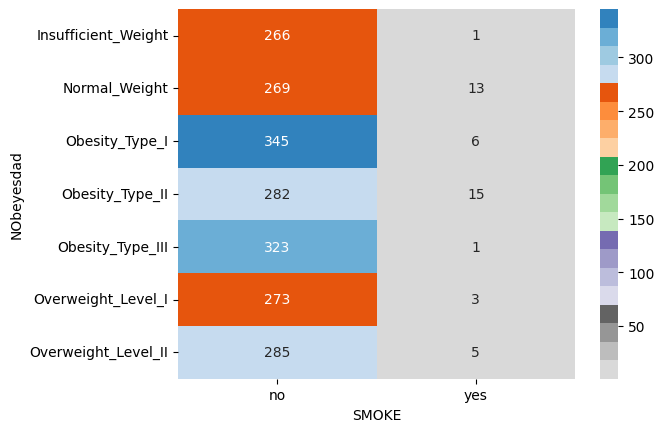

In [76]:
pivot_table = df.pivot_table(index='NObeyesdad', columns='SMOKE', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

In [77]:
df.groupby(["MTRANS", "NObeyesdad"]).size().reset_index(name="count")

,MTRANS,NObeyesdad,count
0,Automobile,Insufficient_Weight,46
1,Automobile,Normal_Weight,44
2,Automobile,Obesity_Type_I,110
3,Automobile,Obesity_Type_II,95
4,Automobile,Obesity_Type_III,1
5,Automobile,Overweight_Level_I,66
6,Automobile,Overweight_Level_II,94
7,Bike,Normal_Weight,4
8,Bike,Obesity_Type_II,1
9,Bike,Overweight_Level_I,2


<Axes: xlabel='NObeyesdad', ylabel='count'>

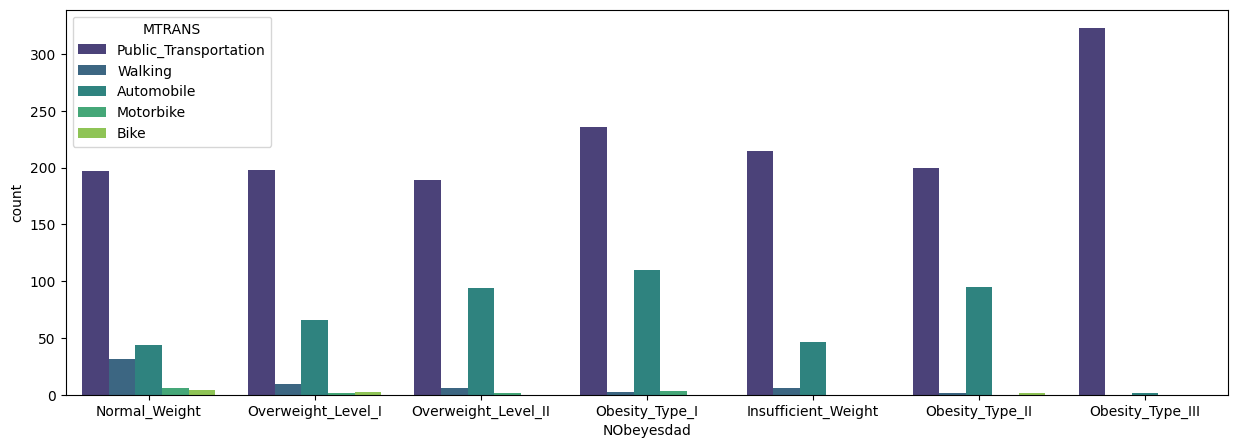

In [78]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="NObeyesdad", hue="MTRANS", palette="viridis")

## Data Preprocessing

In [79]:
all_cols = df.columns.tolist()

In [80]:
encoder = OrdinalEncoder(categories=[['Female', 'Male']])
df[['Gender']] = encoder.fit_transform(df[['Gender']])


encoder = OrdinalEncoder(categories=[['no', 'yes']])
df[['family_history_with_overweight']] = encoder.fit_transform(df[['family_history_with_overweight']])
df[['FAVC']] = encoder.fit_transform(df[['FAVC']])
df[['SMOKE']] = encoder.fit_transform(df[['SMOKE']])
df[['SCC']] = encoder.fit_transform(df[['SCC']])

encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df[['CAEC']] = encoder.fit_transform(df[['CAEC']])
df[['CALC']] = encoder.fit_transform(df[['CALC']])

encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
df[['NObeyesdad']] = encoder.fit_transform(df[['NObeyesdad']])

In [81]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,Public_Transportation,1.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,Public_Transportation,1.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,Public_Transportation,1.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,Walking,2.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,Public_Transportation,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,Public_Transportation,6.0
2083,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,Public_Transportation,6.0
2084,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,Public_Transportation,6.0
2085,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,Public_Transportation,6.0


In [82]:
categorical_cols = ['MTRANS']
categorical_data = df[categorical_cols]

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(categorical_data)

data_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

numeric_cols = [col for col in all_cols if col not in categorical_cols]

df = pd.concat([ df[numeric_cols], data_encoded], axis=1)

In [83]:
df['NObeyesdad'] = df.pop('NObeyesdad')

In [84]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,...,1.0,3.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,...,0.0,2.000000,1.000000,2.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,...,0.0,2.000000,0.000000,2.0,0.0,0.0,0.0,0.0,1.0,2.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.676269,0.906247,1.0,0.0,0.0,0.0,1.0,0.0,6.0
2083,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.341390,0.599270,1.0,0.0,0.0,0.0,1.0,0.0,6.0
2084,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.414209,0.646288,1.0,0.0,0.0,0.0,1.0,0.0,6.0
2085,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.139107,0.586035,1.0,0.0,0.0,0.0,1.0,0.0,6.0


In [85]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [87]:
sc = StandardScaler()

In [88]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Classifier

In [89]:
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
              'min_samples_leaf': [5, 10, 30, 60, 90],
              'max_depth' : [1, 2, 4, 16, 64, None],
              'min_samples_split' :  [2, 10, 100, 300, 600, 900, 1200]}

In [90]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid)
grid.fit(X_train, y_train.ravel())
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [91]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=5)

In [92]:
grid_predictions = grid.predict(X_test)

In [93]:
training_accuracy = round(grid.score(X_train, y_train), 2)

In [94]:
testing_accuracy = round(accuracy_score(y_test, grid_predictions), 2)

In [95]:
print(f"For Decision Tree Classifier, Training accuracy: {training_accuracy}, Testing accuracy: {testing_accuracy}")

For Decision Tree Classifier, Training accuracy: 0.93, Testing accuracy: 0.84


## Random Forest Classifier

In [96]:
param_grid = {'criterion' : ["gini", "entropy"],
              'min_samples_leaf': [5, 10, 30, 60, 90, 120],
              'max_depth' : [1, 2, 4, 16, 64, None],
              'min_samples_split' :  [2, 10, 100, 300, 600, 900]}

In [97]:
grid = GridSearchCV(RandomForestClassifier(),param_grid)
grid.fit(X_train, y_train.ravel())
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [98]:
grid_predictions = grid.predict(X_test)

In [99]:
training_accuracy = round(grid.score(X_train, y_train), 2)

In [100]:
testing_accuracy = round(accuracy_score(y_test, grid_predictions), 2)

In [101]:
print(f"For Random Forest Classifier, Training accuracy: {training_accuracy}, Testing accuracy: {testing_accuracy}")

For Random Forest Classifier, Training accuracy: 0.97, Testing accuracy: 0.85


## XGBoost Classifier

In [102]:
n = int(len(X_train)*0.8) # Let's use 80% to train and 20% to eval

In [103]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [104]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.05,verbosity = 1, random_state = 35, max_depth = 5, gamma = 0.1, reg_alpha = 0.1, reg_lambda = 1, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit.ravel(), eval_set = [(X_train_eval,y_train_eval.ravel())])

[0]	validation_0-mlogloss:1.86144
[1]	validation_0-mlogloss:1.78570
[2]	validation_0-mlogloss:1.72027
[3]	validation_0-mlogloss:1.66115
[4]	validation_0-mlogloss:1.60279
[5]	validation_0-mlogloss:1.55336
[6]	validation_0-mlogloss:1.50426
[7]	validation_0-mlogloss:1.45959
[8]	validation_0-mlogloss:1.41944
[9]	validation_0-mlogloss:1.37963
[10]	validation_0-mlogloss:1.34429
[11]	validation_0-mlogloss:1.30660
[12]	validation_0-mlogloss:1.27508
[13]	validation_0-mlogloss:1.24313
[14]	validation_0-mlogloss:1.21175
[15]	validation_0-mlogloss:1.18286
[16]	validation_0-mlogloss:1.15470
[17]	validation_0-mlogloss:1.12746
[18]	validation_0-mlogloss:1.10165
[19]	validation_0-mlogloss:1.07719
[20]	validation_0-mlogloss:1.05386
[21]	validation_0-mlogloss:1.03130
[22]	validation_0-mlogloss:1.00998
[23]	validation_0-mlogloss:0.99051
[24]	validation_0-mlogloss:0.96967
[25]	validation_0-mlogloss:0.95071
[26]	validation_0-mlogloss:0.93179
[27]	validation_0-mlogloss:0.91402
[28]	validation_0-mlogloss:0.8

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [105]:
training_accuracy = round(accuracy_score(xgb_model.predict(X_train),y_train), 2)

In [106]:
testing_accuracy = round(accuracy_score(xgb_model.predict(X_test),y_test) ,2)

In [107]:
print(f"For XGBoost Classifier, Training accuracy: {training_accuracy}, Testing accuracy: {testing_accuracy}")

For XGBoost Classifier, Training accuracy: 0.97, Testing accuracy: 0.85
